In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [37]:
df_ = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
df = df_.copy()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.000,6.000,MANUAL,rear wheel drive,2.000,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,Luxury,Compact,Convertible,28,18,3916,34500


In [38]:
list = ["Make","Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]
df = df[list].fillna(0)

In [39]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.000,6.000,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.000,6.000,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.000,6.000,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.000,6.000,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.000,6.000,MANUAL,Convertible,28,18,34500


In [40]:
df.rename(columns = {"msrp":"price"}, inplace = True)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.000,6.000,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.000,6.000,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.000,6.000,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.000,6.000,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.000,6.000,MANUAL,Convertible,28,18,34500


In [41]:
dff = df.copy()
mean = dff['price'].mean()

dff['above_average'] = np.where(dff['price']>=mean,1,0)

In [42]:
dff = dff.drop('price', axis=1)
dff.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.000,6.000,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.000,6.000,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.000,6.000,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.000,6.000,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.000,6.000,MANUAL,Convertible,28,18,0


In [43]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(dff, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [45]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [46]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [49]:
cat_cols = [col for col in df_train.columns if df[col].dtype == "O"]
num_cols = [col for col in df_train.columns if df[col].dtype != "O"]

print(f"num_cols : {num}\ncat_cols : {cat}")

num_cols : ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
cat_cols : ['make', 'model', 'transmission_type', 'vehicle_style']


### Q1 : Which numerical variable (among the following 4) has the highest AUC?

In [51]:
#@ CALCULATING ROC AUC SCORE:
for c in num_cols:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

     year, 0.688
engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
 city_mpg, 0.673


In [52]:
print("Q1 : engine_hp")

Q1 : engine_hp


### Q2 : What's the AUC of this model on the validation dataset? (round to 3 digits)

In [56]:
#@ TRAINING LOGISTIC REGRESSION MODEL:
columns = cat_cols + num_cols

train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [75]:
#@ INSPECTING ROC AUC SCORE:
print(f"Q2 : {roc_auc_score(y_val, y_pred).__round__(3)}")

Q2 : 0.977


In [58]:
#@ INSPECTING THE ROC AUC SCORE:
y_pred_bin = model.predict(X_val)
roc_auc_score(y_val, y_pred_bin)

0.9134294805468152

In [59]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.000,654,1729,0,0
10,0.100,644,358,10,1371
20,0.200,625,226,29,1503
30,0.300,603,155,51,1574
40,0.400,585,112,69,1617
50,0.500,568,72,86,1657
60,0.600,518,52,136,1677
70,0.700,489,29,165,1700
80,0.800,427,14,227,1715
90,0.900,349,4,305,1725


### Q3 : At which threshold precision and recall curves intersect?

In [60]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

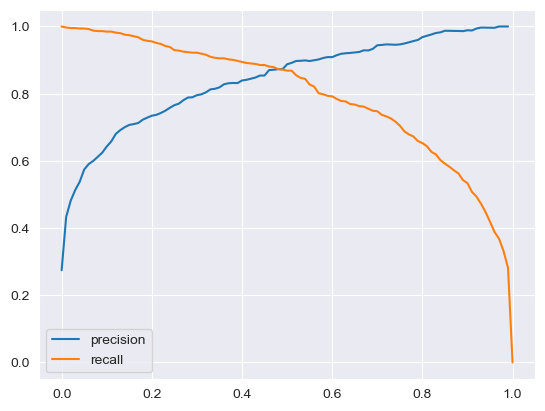

In [61]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.legend()
plt.show()

In [62]:
print("Q3 : 0.48")

Q3 : 0.48


### Q4 : At which threshold F1 is maximal?

In [63]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

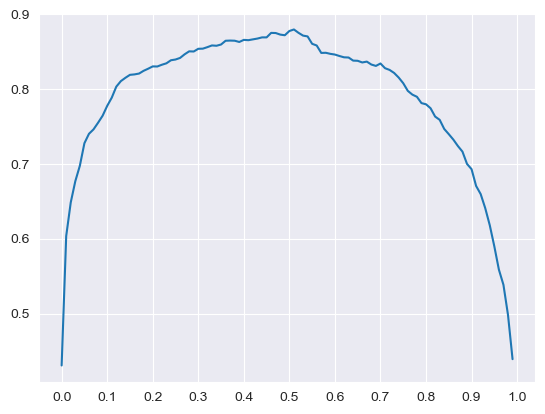

In [64]:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [74]:
print("Q4 : 0.52")

Q4 : 0.52


In [65]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

### Q5 : How large is standard devidation of the scores across different folds?

In [69]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.981 +- 0.003


In [77]:
print("Q5 : 0.003")

Q5 : 0.003


### Q6 : Which C leads to the best mean score?

In [79]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
     

C=0.01, 0.952 +- 0.003
C= 0.1, 0.972 +- 0.002
C= 0.5, 0.978 +- 0.001
C=  10, 0.981 +- 0.003


In [80]:
print("Q6 : 10")

Q6 : 10
